# Отчет студента Звега А.Р. гр. 0382

### Предмет: Компьютерная математика
### Тема: Обратная задача гравиразведки, плотностное моделирование

## Решение прямой задачи в общем виде

Аномалии силы тяжести, вызванные притяжением тел известной формы, размера и избыточной плотности, рассчитывают на основе закона всемирного тяготения (закона Ньютона). Для этого гравитирующее тело разбивают на элементарные массы \\( dm \\); рассчитывают аномалию такой точечной массы \\( \Delta g_1 \\), которая равна вертикальной составляющей силы ньютоновского притяжения \\( F_1 \\) этой массой массы 1 г, находящейся в точке наблюдения \\( A \\), т. е. берут составляющую силы притяжения по направлению действия силы тяжести Земли \\( g \\); наконец, используя принцип суперпозиции, определяют аномалию за счет притяжения всем телом \\( \Delta g_T \\), как сумму притяжении всех элементарных точечных масс, которыми можно представить тело образующие аномалию.

Математически сказанное можно записать так. Согласно выражению \\( F_1 = G\frac{dm}{r^2}\\) , \\( \Delta g_1 = F_1 \cdot cos\alpha = G \cdot dm\frac{\bar z-z}{r^2} \\) ,где 
$$ cos\alpha = \frac{\bar z-z}{r}, r=\sqrt{(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2} $$ - расстояние между точкой наблюдения \\(А (х, у, z)\\) и точкой \\(M( x,y,z )\\), в которой находится элементарная точечная масса. В природных условиях аномальные включения с плотностью \\(\sigma\\) находятся во вмещающей среде с плотностью \\(\sigma_0\\), поэтому под массой \\(dm\\) надо понимать избыточную массу \\(dm = (\sigma — \sigma_0) \space dV =\Delta\sigma \space dV\\), где \\(dV\\)—элементарный объем точечной массы; \\(\Delta\sigma\\) — избыточная плотность. Поэтому окончательные выражения для расчета аномалии силы тяжести точечной массы и тела, используемые в теории гравиразведки, имеют вид
$$\Delta g_1=G \cdot \Delta\sigma\frac{\bar z - z}{r^3} dV, \Delta g_T= \int_v \frac{\Delta\sigma(\bar z - z)dV}{[(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2]^\frac{3}{2}}$$

Интеграл в последней формуле берут по всему объему тела \\(V\\). При \\(\sigma > \sigma_0 \space \Delta g_T\\) имеет положительный знак, т. е. наблюдаются увеличение притяжения и положительные аномалии. При \\(\sigma < \sigma_0 \space \Delta g_T\\) имеет отрицательный знак, т. е. наблюдаются уменьшение притяжения и отрицательные аномалии.



## Пояснения к коду

#### Ключевые слова: 

##### Класс - это объект, который обладает некоторыми полями и методами. 

##### Поля класса - объекты, которые хранят данные, которые в них помещены в ходе создания класса или при выполнении методов. 

##### Методы - "личные" функции класса, используются только конкретным классом. 

##### Перегрузка - множественная реализация функции, метода или оператора. В зависимости от того какого типа объект передается в функцию меняется логика функции. 

##### Оператор - ключевые символы, которым присвоена определенная функция (пример: \\(\_\_mul\_\_\\) - это знак умножения), которая используется для перегрузки.

##### Конструктор - функция \\(\_\_init\_\_\\) , вызывается при создание объекта, принимает данные для полей класса.

## Класс матрицы
Класс имеет 3 поля: \\(n\\) - количество строк, \\(m\\) - количество столбцов, \\(arr\\) - массив чисел;

Так же класс имеет 4 метода и 4 перегруженных оператора:

\\( \_\_mul\_\_\\) -  перегрузка оператора умножения "*", представляет собой перемножение матриц, или умножение матрицы на число.

\\( \_\_add\_\_\\) -  перегрузка оператора сложения "+", представляет собой сложение матриц.

\\( \_\_sub\_\_\\) -  перегрузка оператора вычитания "-", представляет собой вычитание матриц.

\\( \_\_invert\_\_\\) -  перегрузка оператора инвертирования "~", представляет собой взятие обратной матрицы.

\\( transpose\\) -  метод транспонирования матрицы. 

\\( mul\\) -  метод умножения матрицы на число. 

\\( my\_LU\\) -  метод делающий \\(LU\\) разложение. 

\\( LUinv\\) -  метод вычисляющий обратную матрицу, в начале алгоритма производится \\(LU\\) разложение, для того чтобы вычислить обратную матрицу нужно n раз решить СЛАУ: \\(LU A_i^{-1} = E_i\\), для каждого столбца обратной матрицы(\\(E_i\\) - столбец с одной единицей на i строке). Вычисления проходят в 3 этапа: 

1. Решается \\(LY_i = E_i\\), где \\(Y_i = UA_i^{-1}\\)
2. Решается \\(UA_i^{-1} = Y_i\\)
3. Собираются все столбцы \\(A_i^{-1}\\) в одну матрицу \\(A^{-1}\\)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sage
import numpy.linalg as linalg

class Matrix:           
    def __init__(self, arr):
        self.n = len(arr)
        self.m = len(arr[0])
        self.arr = arr
        
    def transpose(self): #Транспонирование
        lst = np.zeros((self.m,self.n))
        for i in np.arange(len(lst)):
            for j in np.arange(len(lst[0])):
                lst[i][j] = self.arr[j][i]
        return Matrix(lst)
    
    
    def my_LU(self,b): #LU разложение
        L  = np.zeros((self.n,self.n))
        U = np.copy(self.arr)
        
        for i in np.arange(self.n):
            for j in np.arange(i,self.n):
                L[j][i]=U[j][i]/U[i][i]
                
        for k in np.arange(1,self.n):
            for i in np.arange(k-1,self.n):
                for j in np.arange(i,self.n):
                    L[j][i]=U[j][i]/U[i][i]
                    
            for i in np.arange(k,self.n):
                for j in np.arange(k-1,self.n):
                    U[i][j]=U[i][j]-L[i][k-1]*U[k-1][j]        
        return Matrix(L),Matrix(U)      
    
    
    def LUinv(self): #Нахождение обратной матрицы
        A = Matrix(np.zeros((self.n,self.m)))
        #L = self.get_L()
        #U = self.get_U()
        L,U = self.my_LU(self.arr)
        for i in np.arange(self.n):
            Ei = Matrix(np.zeros((self.n, 1)))
            Ei.arr[i][0] = 1
            Yi = Matrix(linalg.solve(L.arr,Ei.arr))
            Ai = Matrix(linalg.solve(U.arr,Yi.arr))
            for j in np.arange(self.n):
                A.arr[j][i] = Ai.arr[j][0]
        return A
    
    def mul(self, a):
        arr = np.copy(self.arr)
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                arr[i][j] = arr[i][j] * a
        return Matrix(arr)
                
    def __invert__(self):  #Нахождение обратной матрицы
        if self.n != self.m:
            print("INV: invalid size n != m")
            return Matrix(np.zeros((self.n,self.m)))
        if linalg.det(self.arr) == 0:
            print("")
        return self.LUinv()
    
    def __mul__(self, other): #Умножение матрицы на матрицу или число 
        if isinstance(other, int) or isinstance(other, sage.rings.integer.Integer) or isinstance(other, np.float64):
            arr = np.copy(self.arr)
            for i in np.arange(self.n):
                for j in np.arange(self.m):
                    arr[i][j] = arr[i][j] * other
            return Matrix(arr)
        
        M = Matrix(np.zeros((self.n, other.m)))
        if self.m != other.n:
            print("MUL: invalid size m1 != n2", self.m, other.n)
            return M
        for i in np.arange(self.n):
            for j in np.arange(other.m):
                for r in np.arange(self.m):
                    M.arr[i][j] += self.arr[i][r]*other.arr[r][j]
                    #print(M.arr)
        return M        
    
    def __add__(self,other): #Сложение матриц
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2", self.n, other.n)
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2", self.m, other.m)
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] + other.arr[i][j]
        return M
    
    def __sub__(self,other): #
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2")
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2")
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] - other.arr[i][j]
        return M

## Обратная задача гравиразведки

Задано гравитационное поле в \\(N\\) точках по профилю с некоторым шагом, есть сеточная модель плотностей, состоящая из ячеек, размером \\(MN\\). Нужно найти плотности всех ячеек, получается система уравнений

\begin{cases}
    \Delta g_1 = \Delta g_{111}\sigma_{11} + \Delta g_{112}\sigma_{12} + \dots + \Delta g_{1jk}\sigma_{jk} + \dots + \Delta g_{1MN}\sigma_{MN}\\
    \Delta g_2 = \Delta g_{211}\sigma_{11} + \Delta g_{212}\sigma_{12} + \dots + \Delta g_{2jk}\sigma_{jk} + \dots + \Delta g_{2MN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_i = \Delta g_{i11}\sigma_{11} + \Delta g_{i12}\sigma_{12} + \dots + \Delta g_{ijk}\sigma_{jk} + \dots + \Delta g_{iMN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_N = \Delta g_{N11}\sigma_{11} + \Delta g_{N12}\sigma_{12} + \dots + \Delta g_{Njk}\sigma_{jk} + \dots + \Delta g_{NMN}\sigma_{MN}\\
\end{cases}

где, \\(\Delta g_i\\) - значение аномалии гравитационного поля в \\(i-ой\\) точке профиля;   
\\(\sigma_{jk}\\) - плотность \\(jk-й\\) ячейки;    
\\(\Delta g_{ijk}\\) - гравитационное поле \\(jk-й\\) ячейки с единичной плотностью в \\(i-й\\) точке профиля.

Аномалии гравитационного поля в каждой точке складываются из аномалий, создаваемых каждой ячейкой;    
СЛАУ для сеточной модели не доопределена и имеет бесконечное число решений т.к количество неизвестных больше чем количество уравнений.

$$\Delta g = G\sigma \left( (\xi - x) ln((\xi - x)^2 + (\zeta - z)^2) + 2(\zeta - z)arctg\frac{\xi -x}{\zeta -z}) \right)\Big|^{\xi_2 , \zeta_2}_{\xi_1 , \zeta_1}  $$

$$\Delta g_{ijk} = G\left( (\xi_{jk} - x_i) ln((\xi_{jk} - x_i)^2 + (\zeta_{jk} - z_i)^2) + 2(\zeta_{jk} - z_i)arctg\frac{\xi_{jk} -x_i}{\zeta_{jk} -z_i}) \right)\Big|^{\xi_{2jk} , \zeta_{2jk}}_{\xi_{1jk} , \zeta_{1jk}}  $$

СЛАУ можно записать в матричном виде: \\(\Delta g\\) - вектор столбец наблюденных аномалий силы тяжести, \\(A\\) - оператор прямой задачи, \\(\sigma\\) - вектор столбец плотностей.

$$ A\sigma = \Delta g$$


$$A = 
 \begin{pmatrix}
  \Delta g_{111} & \Delta g_{112} & \cdots & \Delta g_{1jk} & \cdots & \Delta g_{1NM}\\
  \Delta g_{211} & \Delta g_{212} & \cdots & \Delta g_{2jk} & \cdots & \Delta g_{2NM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{i11} & \Delta g_{i12} & \cdots & \Delta g_{ijk} & \cdots & \Delta g_{iNM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{N11} & \Delta g_{N12} & \cdots & \Delta g_{Njk} & \cdots & \Delta g_{NNM}
 \end{pmatrix}
$$

$$\sigma = 
 \begin{pmatrix}
  \sigma_{11}\\
  \sigma_{12}\\
  \cdots \\
  \sigma_{21}\\
  \sigma_{22}\\
  \cdots \\
  \sigma_{ij}\\
  \cdots \\
  \sigma_{MN}
 \end{pmatrix}
$$

$$\Delta g = 
 \begin{pmatrix}
  \Delta g_{1}\\
  \Delta g_{2}\\
  \cdots \\
  \Delta g_{i}\\
  \cdots \\
  \Delta g_{N}
 \end{pmatrix}
$$

Матрица \\(A\\) не квадратная, 

обратная задача решается путем минимизации функционала невязки \\(L\\), 

минимум функционала - градиент равен нулю.
$$ L = ||A\sigma -\Delta g||^2 \to min$$
$$ \nabla L = 2A^T(A\sigma - \Delta g) = 0 $$
$$ \sigma = (A^T A)^{-1}A^T \Delta g $$

## Класс модели

Класс имеет 6 полей: \\(n\\) - количество строк, \\(m\\) - количество столбцов, 

\\(A\\) - матрица гравитационного влияния единичных ячеек на точку, 

\\(deltaG\\) - измеренные данные (то что известно), которые генерируется случайно, представляются в столбце, 

\\(sigma\\) - сетка плотностей (то что находится), которая представлена столбце, 

\\(newDeltaG\\) - рассчитанные данные для сравнения результата расчетов плотностей.

Так же класс имеет 3 метода:

\\(CreateA\\) - метод создания матрицы \\(A\\).

\\(CalcSigma\\) - метод расчета столбца \\(sigma\\).

\\(Line\\) - вспомогательный метод, нужный для перевода столбцов в строки, необходимо для построения графиков.

#### Описание работы класса

Конструктор \\(\_\_init\_\_\\) принимает 3 значения, количество столбцов, количество строк, и измеренные данные.
Поля класса \\(A\\) и \\(sigma\\) считаются методами \\(CreateA\\) и \\(CalcSigma\\), соответственоо. 


In [2]:
global G
G = 6.67*10**(-11)

class SLAE:
    def __init__(self, n, m, deltaG):
        self.n = n
        self.m = m
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    # Подсчет матрицы A
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 1
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    # Подсчет плотности
    def CalcSigma(self):
        return ((~(self.A.transpose() * self.A)) * self.A.transpose()) * self.deltaG 
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

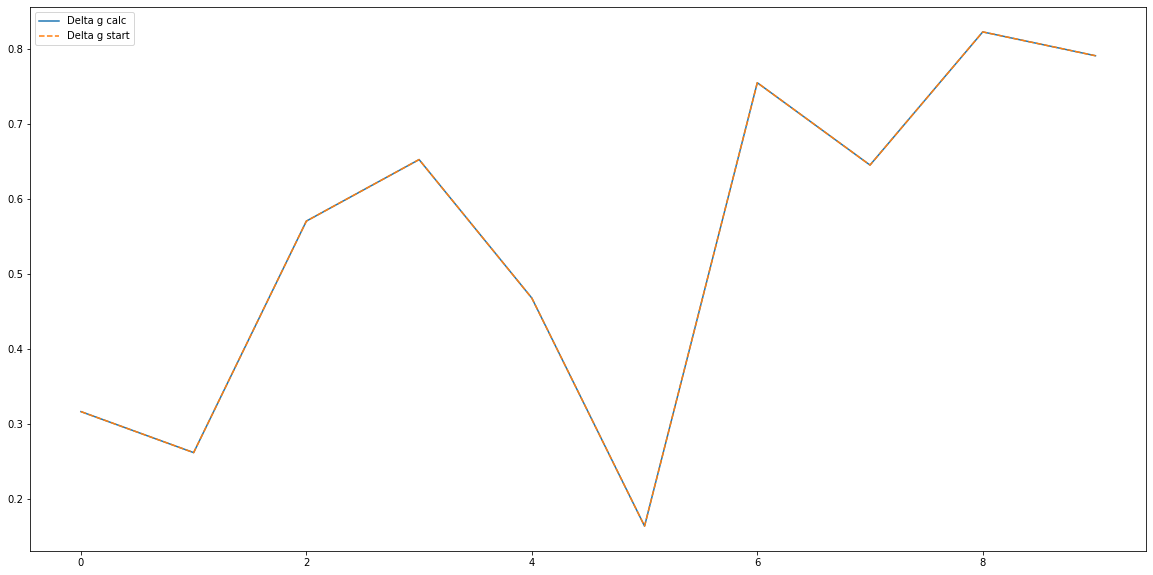

In [3]:
n = 1 #количество строк
m = 10 #количество столбцов
s = SLAE(n,m,np.random.rand(m,1)) #создание объекта класса SLAE

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG),linestyle = "--")
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

Графики налегают друг на друга, поэтому не видно 2.

## Проблемы обратной матрицы и LU разложения

Из-за того как хранятся данные, существует погрешность при нахождении обратной матрицы, в следствии решение является (очень)не точным и не устойчивым, при квадратной модели.

Так как при нахождении обратной матрицы используется \\(LU\\) разложение, временная сложность алгоритма равна \\(O(n^3)\\), что очень медленно.

Приемлемый результат получается при нахождении плотности 1 линии, что показано на графике выше. На графике ниже показан пример вычислений для плотностной модели с 2 линиями.


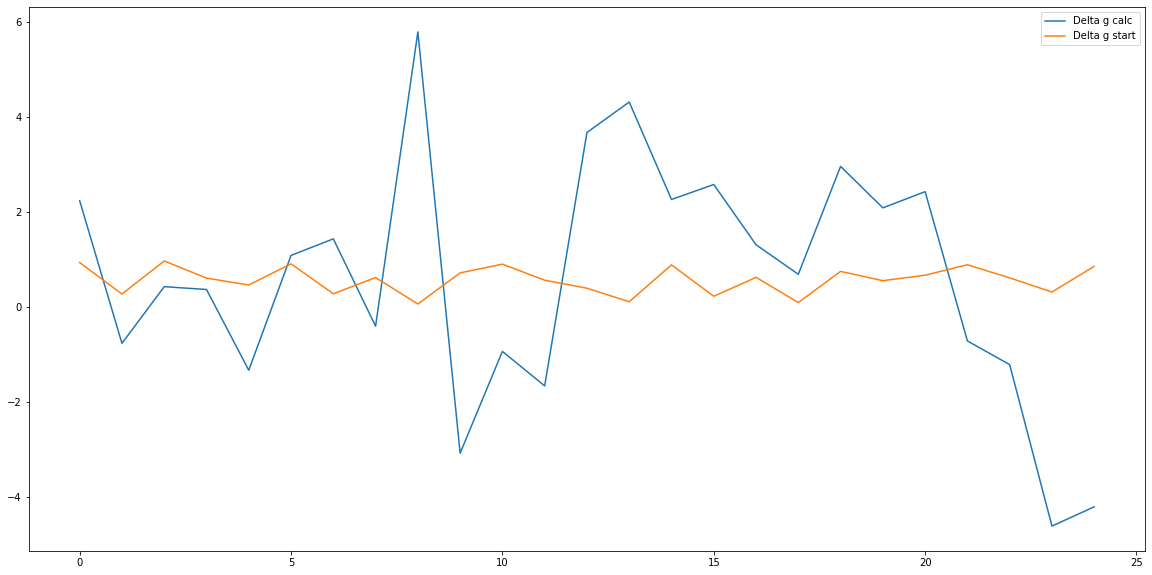

In [4]:
n = 2 #количество строк
m = 25 #количество столбцов
s = SLAE(n,m,np.random.rand(m,1)) #создание объекта класса SLAE

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

## Метод градиентного спуска

Метод градиентного спуска - численный метод нахождения локального экстремума функции. Данный метод итерационный, то есть модель подбирается пошагово.

Градиент функционала - вектор, направленный в сторону наискорейшего возрастания функции.

На каждой итерации рассчитывается градиент функционала невязки для текущего приближения модели:

$$ \nabla L_i = 2A^T(A\sigma_i - \Delta g) + 2c(\sigma_i - \sigma_A)$$

, где \\(c\\) - параметр регуляризации, \\(\sigma_A\\) - априорные данные.

Модель смещается в сторону антиградиента, то есть противоположно направлению возрастания невязки:

$$ \sigma_{i+1} = \sigma_i - \alpha\nabla L_i$$

, где \\(\alpha\\) - масштабный коэффициент(величина шага).


## Класс модели основанной на методе градиентного спуска

Класс имеет 7 полей: \\(n\\) - количество строк, \\(m\\) - количество столбцов, 

\\(iteration\\) - количество итераций.

\\(A\\) - матрица гравитационного влияния единичных ячеек на точку, 

\\(deltaG\\) - измеренные данные (то что известно), которые генерируется случайно, представляются в столбце, 

\\(sigma\\) - сетка плотностей (то что находится), которая представлена столбце, 

\\(newDeltaG\\) - рассчитанные данные для сравнения результата расчетов плотностей.

Так же класс имеет 3 метода:

\\(CreateA\\) - метод создания матрицы \\(A\\).

\\(CalcSigma\\) - метод расчета столбца \\(sigma\\).

\\(gradient\\) - метод нахождения градиента функционала невязки.

\\(Line\\) - вспомогательный метод, нужный для перевода столбцов в строки, необходимо для построения графиков.

#### Описание работы класса

Конструктор \\(\_\_init\_\_\\) принимает 4 значения, количество столбцов, количество строк, измеренные данные и количество итераций.
Поля класса \\(A\\) и \\(sigma\\) считаются методами \\(CreateA\\) и \\(CalcSigma\\), соответственоо.

In [5]:
class GRAD:
    def __init__(self, n, m, deltaG, iteration):
        self.n = n
        self.m = m
        self.iteration = iteration
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    # Подсчет матрицы А
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 1
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    #Подсчет градиента невязки на i шаге
    def Gradient(self, sigma):
        return ((self.A * 2).transpose()) * ((self.A * sigma) - self.deltaG)
    
    # Подсчет плотности
    def CalcSigma(self):
        sigma  = Matrix(np.ones((self.m*self.n, 1)))
        a = 1/(self.A.arr[self.m - 1][self.n*self.m - 1]**(1.91))
        for i in np.arange(self.iteration):
            g = self.Gradient(sigma)
            sigma =  sigma - (g * a)
        return sigma
    
    def GradientAprior(self, sigma, apr, reg):
        return ((self.A * 2).transpose()) * ((self.A * sigma) - self.deltaG) + (reg * 2) * (sigma - apr) 
    
    # Подсчет плотности с априорными данными
    def CalcSigmaAprior(self, apr, reg):
        sigma  = Matrix(np.zeros((self.m*self.n, 1)))
        a = 1/(self.A.arr[0][0]**(1.92))
        for i in np.arange(self.iteration):
            sigma =  sigma - (self.GradientAprior(sigma, apr, reg) * a)
        self.sigma = sigma
        return sigma
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

In [6]:
import random

n = 10 #количество строк
m = 30 #количество столбцов
it = 25 #количество итераций для 1 приближения
it2 = 5 #количество итераций для 2 приближения
#it3 = 10
deltaG = np.random.rand(m,1)# генирация измеренных данных
noiseG =  np.zeros((m, 1))

# генерация шума 
for i in np.arange(m):
    deltaG[i] =  deltaG[i]/100
    noiseG[i] = deltaG[i] - 0.0005 + random.random()/1000

s = GRAD(n,m,deltaG,it)#создание объекта класса GRAD 1 приближения
s2 = GRAD(n,m,noiseG,it)#создание объекта класса GRAD с шумом
s3 = GRAD(n,m,deltaG,it2) #создание объекта класса GRAD 2 приближения

for i in np.arange(m):
    noiseG[i] = deltaG[i] - 0.005 + random.random()/100

s4 = GRAD(n,m,noiseG,it)#создание объекта класса GRAD 1 приближения

### График рассчитаных гравитационных аномалий

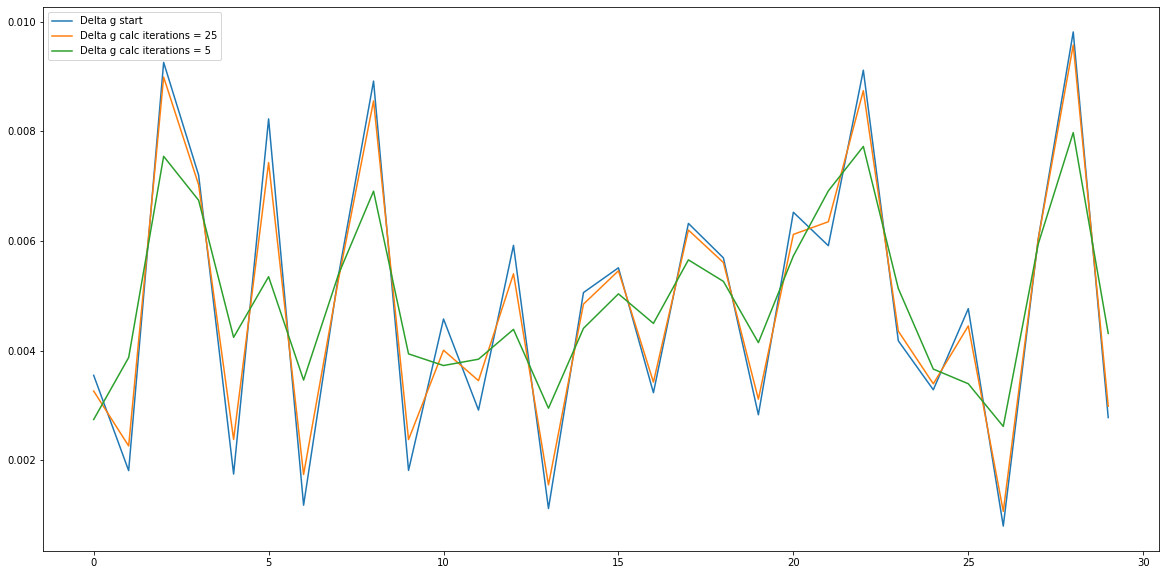

In [7]:
#print("DELTA G: \n", s.Line(s.deltaG))
#print("NOISE G: \n", s2.Line(s2.deltaG))
#print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("SIGMA: \n",s.Line(s.sigma))
#print("SIGMA: \n",s2.Line(s2.sigma))

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p3, = plt.plot(np.arange(s3.m),s.Line(s3.newDeltaG))
plt.legend([p1,p2,p3],['Delta g start', 'Delta g calc iterations = 25', 'Delta g calc iterations = 5'])
plt.show()

### График для сравнения результатов с шумом и без

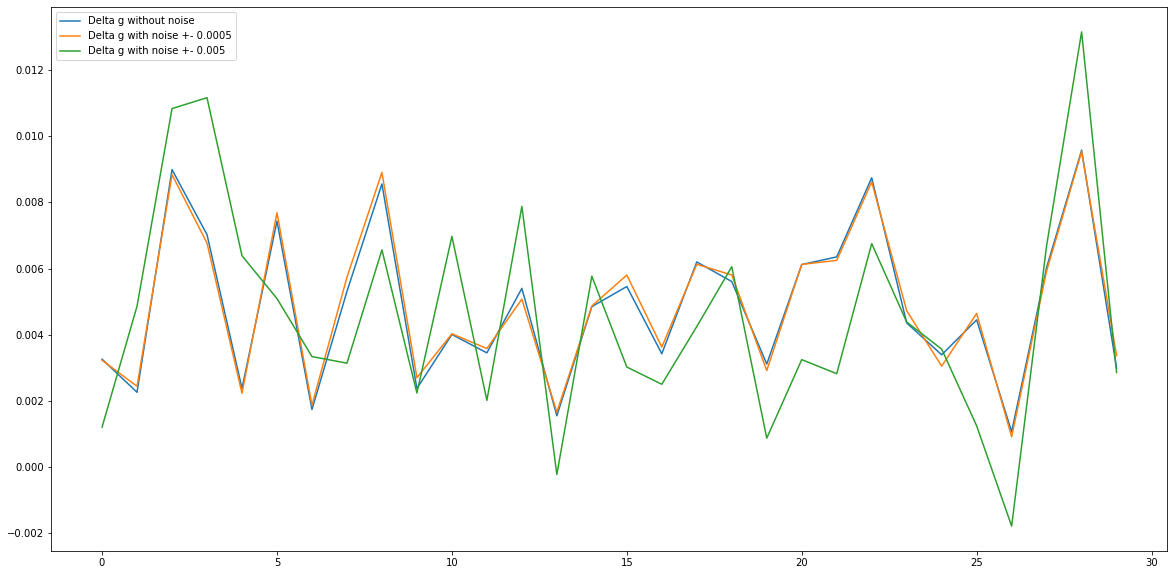

In [8]:
plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s2.m),s.Line(s2.newDeltaG))
p3, = plt.plot(np.arange(s4.m),s.Line(s4.newDeltaG))
plt.legend([p1,p2, p3],['Delta g without noise', 'Delta g with noise +- 0.0005', 'Delta g with noise +- 0.005'])
plt.show()

In [9]:
arr1 = np.zeros((s.n, s.m))
arr2 = np.zeros((s.n, s.m))
arr3 = np.zeros((s.n, s.m))
arr4 = np.zeros((s.n, s.m))
for i in np.arange(s.n-1):
    arr1[i] = s.Line(s.sigma)[i*s.m : i*s.m + s.m]
    arr2[i] = s2.Line(s2.sigma)[i*s2.m : i*s2.m + s2.m]
    arr3[i] = s3.Line(s3.sigma)[i*s3.m : i*s3.m + s3.m]
    arr4[i] = s4.Line(s4.sigma)[i*s4.m : i*s4.m + s4.m]

### Распределение плотности при 25 итерациях

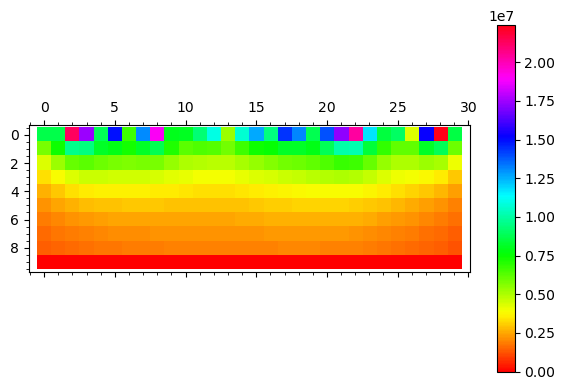

In [10]:
matrix_plot(arr1, cmap='hsv',colorbar=True)

### Распределение плотности при 5 итерациях

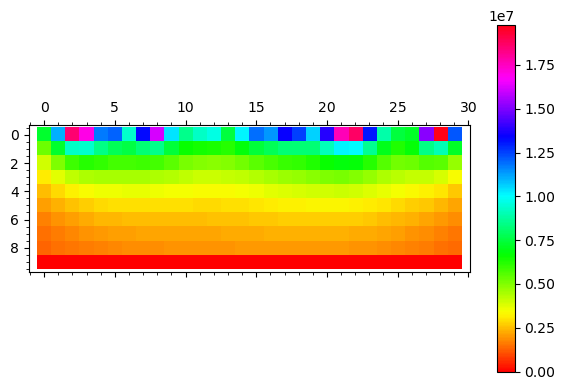

In [11]:
matrix_plot(arr3, cmap='hsv',colorbar=True)

### Распределение плотности с шумом +- 0,0005

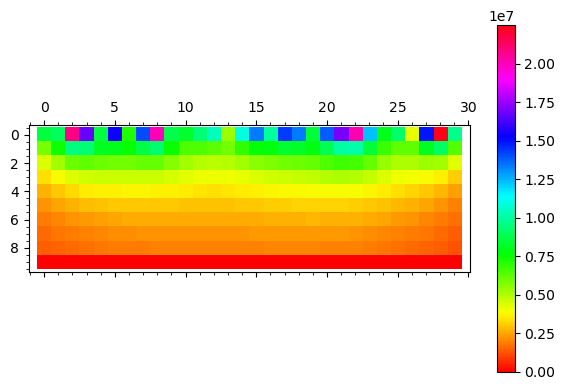

In [12]:
matrix_plot(arr2, cmap='hsv',colorbar=True)

### Распределение плотности с шумом +- 0,005

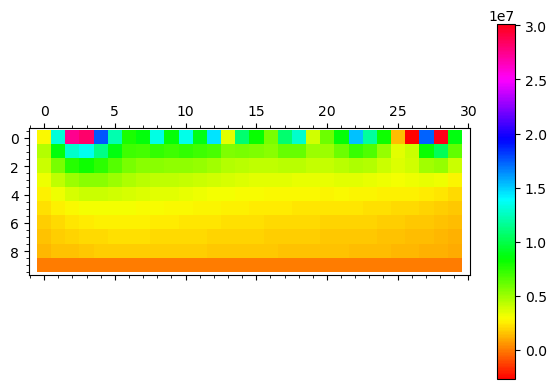

In [13]:
matrix_plot(arr4, cmap='hsv',colorbar=True)

## Преимущества метода градиентного спуска

Для вычисления плотности не нужно считать обратную матрицу, в следствии чего алгоритм работает быстрее и точнее.

Алгоритм является более устойчивым.

Точность модели зависит от количества итераций, что дает выбор между скоростью и точностью.

Примерна сложность алгоритма \\(O(i*n^2)\\), где \\(i\\) количество итераций, но бесконечно увеличивать \\(i\\) не имеет смысла, правильно подобрав параметр \\(\alpha\\) можно добиться большей точности при меньшем количестве итераций. Так что \\(i\\) можно считать константой, что дает временную сложность алгоритма \\(O(n^2)\\).

## Использованыйе статьи

1. https://teach-in.ru/file/synopsis/pdf/gravity-prospection-lygin-M.pdf
2. http://www.vestnik.vsu.ru/pdf/heologia/2007/01/2007-01-14.pdf
3. https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA